Zadanie 1

W tym zadaniu należy pobrać zestaw danych z 2 plików - zbiór danych 2D i zbiór danych mnist. Dla każdego z nich zastosuj algorytm K-średnich do grupowania. Użyj metody łokciowej, aby znaleźć optymalną liczbę klastrów.



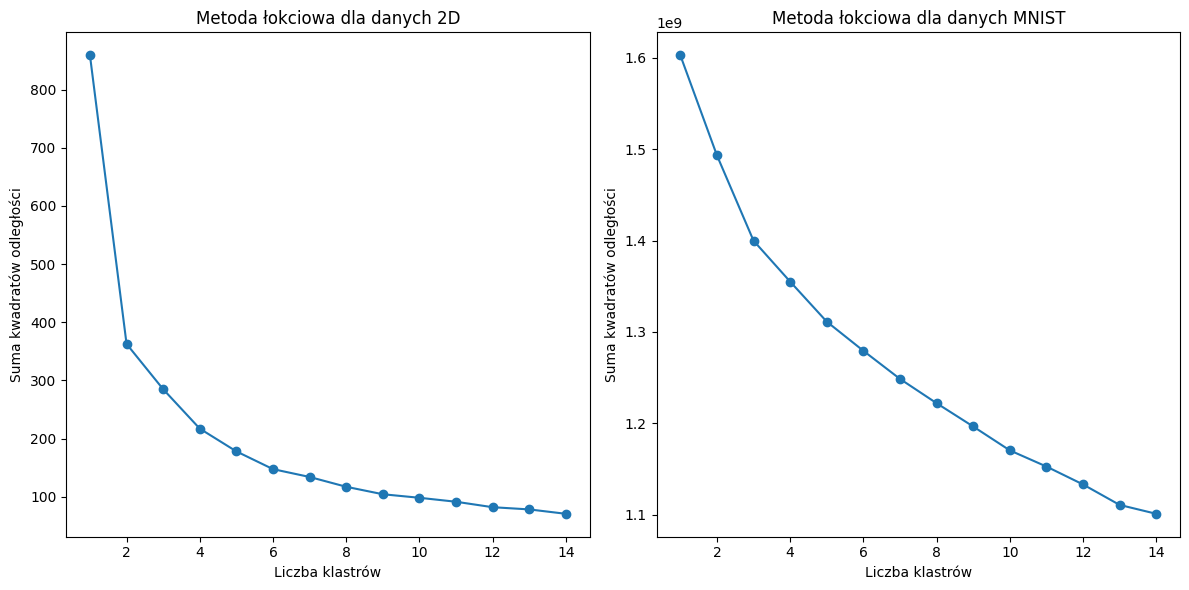

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data_2d = pd.read_csv("data_2d.csv")

mnist = pd.read_csv("mnist.csv")


sse_2d = []
for k in range(1, 15):
    kmeans_2d = KMeans(n_clusters=k, random_state=42)
    kmeans_2d.fit(data_2d)
    sse_2d.append(kmeans_2d.inertia_)


sse_mnist = []
for k in range(1, 15):
    kmeans_mnist = KMeans(n_clusters=k, random_state=42)
    kmeans_mnist.fit(mnist)
    sse_mnist.append(kmeans_mnist.inertia_)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 15), sse_2d, marker='o')
plt.title('Metoda łokciowa dla danych 2D')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów odległości')
plt.subplot(1, 2, 2)
plt.plot(range(1, 15), sse_mnist, marker='o')
plt.title('Metoda łokciowa dla danych MNIST')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów odległości')
plt.tight_layout()
plt.show()

Zadanie 2

Zwizualizuj wynik grupowania. W przypadku zbioru danych mnist należy również użyć algorytmu PCA, aby zredukować wymiarowość danych do wersji dwuwymiarowej.

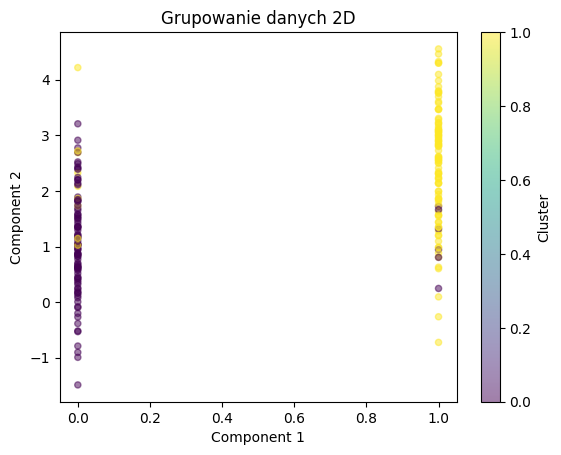

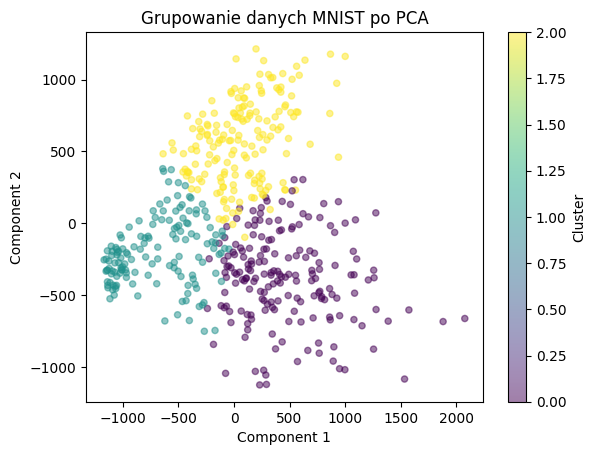

In [12]:
from sklearn.decomposition import PCA


def visualize_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=20, alpha=0.5)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


k_optimal_2d = 2
kmeans_2d = KMeans(n_clusters=k_optimal_2d, random_state=42)
labels_2d = kmeans_2d.fit_predict(data_2d)


visualize_clusters(data_2d.values, labels_2d, 'Grupowanie danych 2D')


pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(mnist)


k_optimal_mnist = 3
kmeans_mnist = KMeans(n_clusters=k_optimal_mnist, random_state=42)
labels_mnist = kmeans_mnist.fit_predict(mnist)


visualize_clusters(data_mnist_pca, labels_mnist, 'Grupowanie danych MNIST po PCA')
